In [117]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [92]:
def argmax(q_values):
    max_val = -10000000
    actions = []
    for i in range(len(q_values)):
        if q_values[i] > max_val:
            actions.clear()
            actions.append(i)
            max_val = q_values[i]
        elif q_values[i] == max_val:
            actions.append(i)

    return np.random.choice(actions)

In [100]:
class Environment:
    def __init__(self, size) -> None:
        self.size = size
        self.arms = np.array([np.random.normal(0, 1) for _ in range(size)])

    def step(self, action):
        return np.random.normal(self.arms[action], 1)
    
    def copy(self):
        env = Environment(self.size)
        env.arms = np.copy(self.arms)
        
        return env


class Agent:
    def __init__(self, num_actions = 10, epsilon = 0.1) -> None:
        self.num_actions = num_actions # total number of action
        self.last_action = None
        self.epsilon = epsilon
        self.arm_count = [0 for i in range(num_actions)]
        self.q_values = [0 for i in range(num_actions)]
        
    def clear(self):
        self.last_action = None
        self.arm_count = [0 for i in range(self.num_actions)]
        self.q_values = [0 for i in range(self.num_actions)]

    def step(self, reward):
        # update for previous action
        self.arm_count[self.last_action] += 1
        self.q_values[self.last_action] += 1 / self.arm_count[self.last_action] * (reward - self.q_values[self.last_action])

        # new action is now taken
        if np.random.random() < self.epsilon:
            self.last_action = np.random.randint(0, self.num_actions)
        else:
            self.last_action = argmax(self.q_values)

        return self.last_action

In [89]:
class RL:
    def __init__(self, env:Environment, agent:Agent) -> None:
        agent.clear()
        self.env = env
        self.agent = agent
        self.total_reward = 0
        self.total_steps = 0
        self.last_action = np.random.randint(0, env.size)
        self.agent.last_action = self.last_action

    def rl_step(self):
        self.total_steps += 1
        reward = self.env.step(self.last_action)
        self.total_reward += reward
        self.last_action = self.agent.step(reward)

        return reward

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:13<00:00, 14.83it/s]


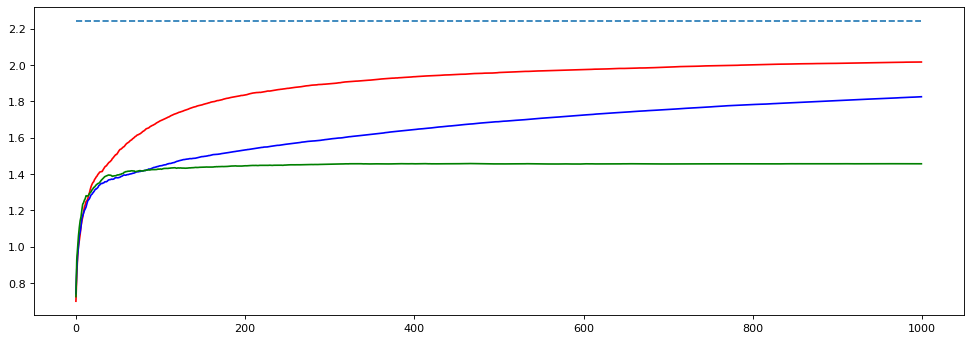

In [116]:
num_runs = 200

all_averages = []
all_averages_01 = []
greedy_all_averages = []
# initialize environment
np.random.seed(0)
env = Environment(10)
greedy_env = env.copy()

agent = Agent(epsilon=0.1)
agent_01 = Agent(epsilon=0.01)
greedy_agent = Agent(epsilon = 0.0)

average_best = 0
for run in tqdm(range(num_runs)):
    np.random.seed(run)
    rl = RL(env, agent)
    rl_01 = RL(env, agent_01)
    greedy_rl = RL(greedy_env, greedy_agent)
    
    total_reward = 0
    total_reward_01 = 0
    greedy_total_reward = 0
    
    averages = []
    averages_01 = []
    greedy_averages = []
    
    average_best += np.max(rl.env.arms)
    for i in range(1000):
        reward = rl.rl_step()
        total_reward += reward 
        averages.append(total_reward / (i + 1))
        
        reward = rl_01.rl_step()
        total_reward_01 += reward 
        averages_01.append(total_reward_01 / (i + 1))

        greedy_reward = greedy_rl.rl_step()
        greedy_total_reward += greedy_reward 
        greedy_averages.append(greedy_total_reward / (i + 1))
        
    all_averages.append(averages)
    all_averages_01.append(averages_01)
    greedy_all_averages.append(greedy_averages)


plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([average_best / num_runs for _ in range(1000)], linestyle="--")
plt.plot(np.mean(all_averages, axis=0), 'r')
plt.plot(np.mean(all_averages_01, axis=0), 'b')
plt.plot(np.mean(greedy_all_averages, axis=0), 'g')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.61it/s]


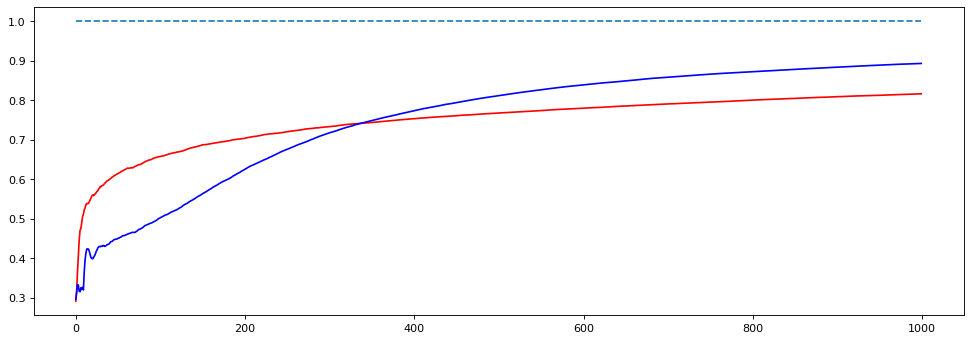

In [133]:
class AgentConstantStepSize:
    def __init__(self, num_actions = 10, epsilon = 0.1, alpha = 0.1) -> None:
        self.num_actions = num_actions # total number of action
        self.last_action = None
        self.epsilon = epsilon
        self.arm_count = [0 for i in range(num_actions)]
        self.q_values = [0 for i in range(num_actions)]
        self.alpha = alpha
        
    def clear(self):
        self.last_action = None
        self.arm_count = [0 for i in range(self.num_actions)]
        self.q_values = [0 for i in range(self.num_actions)]

    def step(self, reward):
        # update for previous action
        self.arm_count[self.last_action] += 1
        self.q_values[self.last_action] += self.alpha * (reward - self.q_values[self.last_action])

        # new action is now taken
        if np.random.random() < self.epsilon:
            self.last_action = np.random.randint(0, self.num_actions)
        else:
            self.last_action = argmax(self.q_values)

        return self.last_action

class AgentOptimistic:
    def __init__(self, num_actions = 10, epsilon = 0.1) -> None:
        self.num_actions = num_actions # total number of action
        self.last_action = None
        self.epsilon = epsilon
        self.arm_count = [0 for i in range(num_actions)]
        self.q_values = [5 for i in range(num_actions)]
        
    def clear(self):
        self.last_action = None
        self.arm_count = [0 for i in range(self.num_actions)]
        self.q_values = [5 for i in range(self.num_actions)]

    def step(self, reward):
        # update for previous action
        self.arm_count[self.last_action] += 1
        self.q_values[self.last_action] += 0.1 * (reward - self.q_values[self.last_action])

        # new action is now taken
        if np.random.random() < self.epsilon:
            self.last_action = np.random.randint(0, self.num_actions)
        else:
            self.last_action = argmax(self.q_values)

        return self.last_action
    
num_runs = 200

all_averages = []
optimistic_all_averages = []
# initialize environment
np.random.seed(0)
env = Environment(10)
optimistic_env = env.copy()

agent = AgentConstantStepSize(epsilon=0.1)
optimistic_agent = AgentOptimistic(epsilon=0)
average_best = 0
num_steps = 1000
for run in tqdm(range(num_runs)):
    np.random.seed(run)
    rl = RL(env, agent)
    rl_optimistic = RL(optimistic_env, optimistic_agent)
    
    total_reward = 0
    total_reward_optimistic = 0
    
    averages = []
    averages_optimistic = []
    
    average_best += np.max(rl.env.arms)
    for i in range(num_steps):
        reward = rl.rl_step()
        total_reward += reward 
        averages.append(total_reward / (i + 1))
        
        reward = rl_optimistic.rl_step()
        total_reward_optimistic += reward 
        averages_optimistic.append(total_reward_optimistic / (i + 1))
    
    all_averages.append(averages)
    optimistic_all_averages.append(averages_optimistic)


average_best = average_best / num_runs
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([1 for _ in range(num_steps)], linestyle="--")
plt.plot(np.mean(all_averages, axis=0) / average_best, 'r')
plt.plot(np.mean(optimistic_all_averages, axis=0) / average_best, 'b')
plt.show()